In [1]:
import json
import os
from os import listdir, getcwd, chdir
from os.path import isfile, join

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from track_o_nauts.data_separation import read_feature, filter_feature, remove_nans_feature, read_json, put_together 
from track_o_nauts.TrackONautsVis import position_plot, pairwise_plot, pair_plot, violin_plot

In [2]:
msd_data_path = "track_o_nauts/test_data/msd_data"
feature_data_path = "track_o_nauts/test_data/feature_data"
json_filepath = "track_o_nauts/test_data/json_file/15_models_10_percent.json"

In [3]:
# Determine number of files in dataset
msd_files = [f for f in listdir(msd_data_path) if isfile(join(msd_data_path, f)) and '.csv' in f and 'P' in f]
feature_files = [f for f in listdir(feature_data_path) if isfile(join(feature_data_path, f)) and '.csv' in f and 'P' in f]
# print(len(msd_files))
print(type(feature_files))

<class 'list'>


In [4]:
# Load the json file
with open(json_filepath, "r") as f1:
    json_data = json.load(f1)

In [5]:
print(len(feature_files))
print(len(json_data.keys()))

5
75


In [6]:
feature_list = [
    'alpha', # Fitted anomalous diffusion alpha exponenet
    'D_fit', # Fitted anomalous diffusion coefficient
    'kurtosis', # Kurtosis of track
    'asymmetry1', # Asymmetry of trajecory (0 for circular symmetric, 1 for linear)
    'asymmetry2', # Ratio of the smaller to larger principal radius of gyration
    'asymmetry3', # An asymmetric feature that accnts for non-cylindrically symmetric pt distributions
    'AR', # Aspect ratio of long and short side of trajectory's minimum bounding rectangle
    'elongation', # Est. of amount of extension of trajectory from centroid
    'boundedness', # How much a particle with Deff is restricted by a circular confinement of radius r
    'fractal_dim', # Measure of how complicated a self similar figure is
    'trappedness', # Probability that a particle with Deff is trapped in a region
    'efficiency', # Ratio of squared net displacement to the sum of squared step lengths
    'straightness', # Ratio of net displacement to the sum of squared step lengths
    'MSD_ratio', # MSD ratio of the track
#     'frames', # Number of frames the track spans
    'Deff1', # Effective diffusion coefficient at 0.33 s
    'Deff2', # Effective diffusion coefficient at 3.3 s
    'Mean alpha', #mean values are more predictive
    'Mean D_fit', 
    'Mean kurtosis', 
    'Mean asymmetry1', 
    'Mean asymmetry2',
    'Mean asymmetry3', 
    'Mean AR',
    'Mean elongation', 
    'Mean boundedness',
    'Mean fractal_dim', 
    'Mean trappedness', 
    'Mean efficiency',
    'Mean straightness', 
    'Mean MSD_ratio', 
    'Mean Deff1', 
    'Mean Deff2',
    ]

In [7]:
put_together(json_data, feature_list, feature_data_path, feature_files)

{'features_P70_40nm_s3_v2':          alpha      D_fit  kurtosis  asymmetry1  asymmetry2  asymmetry3  \
 0     0.002963  13.861155  1.951582    0.368929    0.494216    0.058996   
 1     0.034715   7.973345  1.476369    0.983841    0.063818    0.489746   
 2     2.277251   0.003860  7.561177    0.697284    0.299829    0.156747   
 3     0.375901   4.945959  2.654218    0.293857    0.544926    0.044352   
 4     2.238962   0.104820  1.989186    0.990877    0.047866    0.532413   
 ...        ...        ...       ...         ...         ...         ...   
 1358  1.633730   0.717096  1.976546    0.993228    0.041217    0.551584   
 1359  0.446083  20.242317  3.182281    0.983853    0.063795    0.489805   
 1360  0.715355   2.863551  3.643441    0.828643    0.216695    0.232231   
 1361  4.761943   0.000006  3.288581    0.987585    0.055885    0.510405   
 1362  0.142533   4.783165  2.845786    0.872573    0.184564    0.270414   
 
             AR  elongation  boundedness  fractal_dim  ... 

In [8]:
# Test
quality_feature = put_together(json_data, feature_list, feature_data_path, feature_files)
quality_feature['features_P35_brain_2_slice_3_vid_3']

,alpha,D_fit,kurtosis,asymmetry1,asymmetry2,asymmetry3,AR,elongation,boundedness,fractal_dim,...,Mean straightness,Mean MSD_ratio,Mean Deff1,Mean Deff2,Track_ID,X,Y,frames,Quality,Category
0,6.653469e-01,9.745192,1.663452,0.539237,0.391388,0.100556,1.997037,0.499258,0.114846,2.071108,...,0.093899,0.158883,4.040639,NaN,0.0,338.298064,2025.710646,26.0,0.466667,medium
1,2.410777e-02,0.748813,3.477163,0.983043,0.065389,0.485780,3.228856,0.690293,0.067866,2.389259,...,0.178229,1.361120,4.071083,NaN,1.0,401.639504,1600.283981,69.0,0.000000,low
2,9.061676e-01,0.932989,3.504095,0.847048,0.203656,0.247001,1.749265,0.428331,0.038564,1.933566,...,0.261922,0.370714,9.566983,NaN,2.0,494.203369,1899.951200,58.0,0.000000,low
3,2.870743e+00,0.009708,4.507267,0.947345,0.116284,0.375947,4.336282,0.769388,0.060547,1.507979,...,0.261922,0.370714,9.566983,NaN,3.0,483.492834,1846.958416,19.0,0.000000,low
4,5.453052e-01,49.830040,2.966224,0.882514,0.176734,0.280685,2.084090,0.520174,0.040166,1.610169,...,0.261922,0.370714,9.566983,NaN,4.0,441.605654,1824.303991,37.0,0.066667,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
678,1.228364e-01,21.615462,3.930350,0.929188,0.135496,0.342241,1.842346,0.457214,0.200769,1.711459,...,0.215432,0.550846,3.929236,NaN,811.0,1906.878323,409.187294,13.0,0.266667,low
679,4.738878e-01,20.894910,1.722395,0.521605,0.401610,0.095559,1.125598,0.111584,0.224535,1.833578,...,0.253596,0.242895,7.505805,NaN,812.0,1862.772995,254.490957,11.0,0.000000,low
680,1.973549e+00,0.180201,4.339010,0.767341,0.257118,0.191894,2.002569,0.500642,0.108952,2.096785,...,0.220165,0.179334,10.623535,NaN,813.0,1672.599074,277.612709,27.0,0.266667,low
681,2.002772e-07,12.022219,2.665879,0.901019,0.161405,0.302025,1.841821,0.457059,0.172406,1.615055,...,0.085414,5.389569,0.271088,NaN,814.0,1682.135763,157.832660,13.0,0.200000,low


In [9]:
# Convert quality_feature from dict to dataframe
features_df = pd.DataFrame.from_dict(quality_feature['features_P35_brain_2_slice_3_vid_3'])
features_df

,alpha,D_fit,kurtosis,asymmetry1,asymmetry2,asymmetry3,AR,elongation,boundedness,fractal_dim,...,Mean straightness,Mean MSD_ratio,Mean Deff1,Mean Deff2,Track_ID,X,Y,frames,Quality,Category
0,6.653469e-01,9.745192,1.663452,0.539237,0.391388,0.100556,1.997037,0.499258,0.114846,2.071108,...,0.093899,0.158883,4.040639,NaN,0.0,338.298064,2025.710646,26.0,0.466667,medium
1,2.410777e-02,0.748813,3.477163,0.983043,0.065389,0.485780,3.228856,0.690293,0.067866,2.389259,...,0.178229,1.361120,4.071083,NaN,1.0,401.639504,1600.283981,69.0,0.000000,low
2,9.061676e-01,0.932989,3.504095,0.847048,0.203656,0.247001,1.749265,0.428331,0.038564,1.933566,...,0.261922,0.370714,9.566983,NaN,2.0,494.203369,1899.951200,58.0,0.000000,low
3,2.870743e+00,0.009708,4.507267,0.947345,0.116284,0.375947,4.336282,0.769388,0.060547,1.507979,...,0.261922,0.370714,9.566983,NaN,3.0,483.492834,1846.958416,19.0,0.000000,low
4,5.453052e-01,49.830040,2.966224,0.882514,0.176734,0.280685,2.084090,0.520174,0.040166,1.610169,...,0.261922,0.370714,9.566983,NaN,4.0,441.605654,1824.303991,37.0,0.066667,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
678,1.228364e-01,21.615462,3.930350,0.929188,0.135496,0.342241,1.842346,0.457214,0.200769,1.711459,...,0.215432,0.550846,3.929236,NaN,811.0,1906.878323,409.187294,13.0,0.266667,low
679,4.738878e-01,20.894910,1.722395,0.521605,0.401610,0.095559,1.125598,0.111584,0.224535,1.833578,...,0.253596,0.242895,7.505805,NaN,812.0,1862.772995,254.490957,11.0,0.000000,low
680,1.973549e+00,0.180201,4.339010,0.767341,0.257118,0.191894,2.002569,0.500642,0.108952,2.096785,...,0.220165,0.179334,10.623535,NaN,813.0,1672.599074,277.612709,27.0,0.266667,low
681,2.002772e-07,12.022219,2.665879,0.901019,0.161405,0.302025,1.841821,0.457059,0.172406,1.615055,...,0.085414,5.389569,0.271088,NaN,814.0,1682.135763,157.832660,13.0,0.200000,low


In [10]:
sns.set_style("white") # Set style of seaborn plot

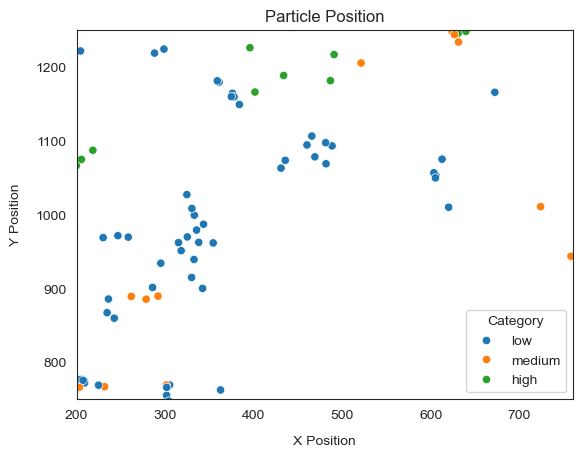

1
X bounds:  (200.0, 760.0)
Plot title:  Particle Position


In [11]:
fig = position_plot(features_df, x_bounds = [200, 760], y_bounds = [750, 1250])
print(len(fig.axes))

x_bound = fig.gca().get_xlim()
print("X bounds: ", x_bound)
assert x_bound == (200, 760)

plot_title = fig.gca().get_title()
print("Plot title: ", plot_title)
assert plot_title == "Particle Position"

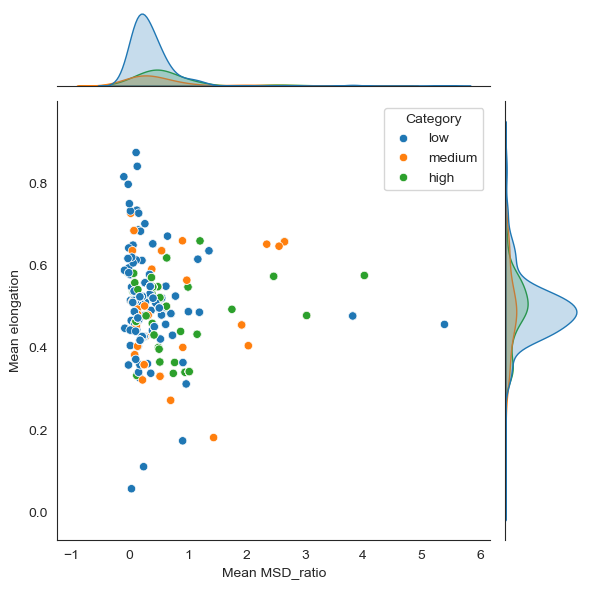

In [12]:
fig = pair_plot(features_df, feature1="Mean MSD_ratio", feature2="Mean elongation")

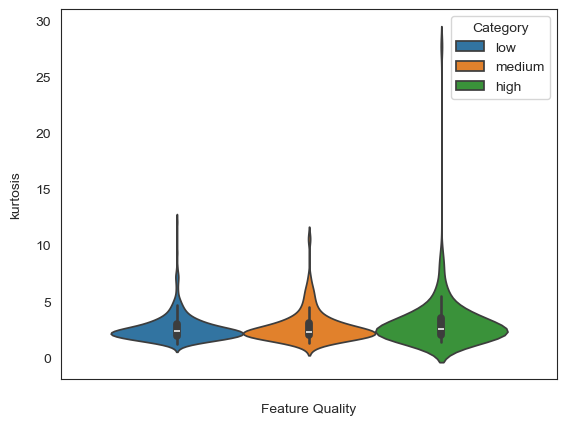

In [13]:
fig = violin_plot(features_df, feature="kurtosis")